<h1><center> CHAPTER 2: Accessing Text Corpora and Lexical Resources </center></h1>

In Natural Language Processing, practical research typically utilizes big linguistic information bodies, or corpora. The purpose of this section is to answer the following questions: 



*   What are some helpful corpora text and lexical resources, and how can we use Python to access them?


*   Which constructs of Python are most useful for this job?



*   When writing Python code, how can we prevent repeating ourselves?














<h2>1. Accessing Text Corpora</h2>


**Text corpus** is a large body of text. Many corpora are designed to contain a careful balance of material in one or more genres. 

<h3>Gutenberg Corpus</h3>

NLTK includes 25000 electronics books from Project Gutenberg electronic text archive in this corpus. File ids within corpus can be viewed by fileids() method.

In [2]:
import nltk
nltk.download('book')

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/chat80.zip.
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2000.zip.
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2002.zip.
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/dependency_treebank.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    

True

In [3]:
nltk.download('gutenberg')
from nltk.corpus import gutenberg

gutenberg.fileids()
['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', ...]
emma = gutenberg.words('austen-emma.txt')
print("File id's of Gutenberg Corpus:", gutenberg.fileids())
print("Austen, Emma token count: ",len(emma))
#import nltk                                                     //this can also be done but it is much longer and less readable, choose above!
#print("File id's of Gutenberg Corpus: ",nltk.corpus.gutenberg.fileids())
#emma = nltk.corpus.gutenberg.words('austen-emma.txt')
#print("Austen, Emma token count: ",len(emma))

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
File id's of Gutenberg Corpus: ['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']
Austen, Emma token count:  192427


We can also use concordance (C1 notebook), but it requires extra steps to use. Previously, we have used texts from book.  Now we will use data from corpus so data must be transformed using nltk.Text().

In [0]:
emma = nltk.Text(nltk.corpus.gutenberg.words('austen-emma.txt'))
emma.concordance("surprize")

Displaying 25 of 37 matches:
er father , was sometimes taken by surprize at his being still able to pity ` 
hem do the other any good ." " You surprize me ! Emma must do Harriet good : a
Knightley actually looked red with surprize and displeasure , as he stood up ,
r . Elton , and found to his great surprize , that Mr . Elton was actually on 
d aid ." Emma saw Mrs . Weston ' s surprize , and felt that it must be great ,
father was quite taken up with the surprize of so sudden a journey , and his f
y , in all the favouring warmth of surprize and conjecture . She was , moreove
he appeared , to have her share of surprize , introduction , and pleasure . Th
ir plans ; and it was an agreeable surprize to her , therefore , to perceive t
talking aunt had taken me quite by surprize , it must have been the death of m
f all the dialogue which ensued of surprize , and inquiry , and congratulation
 the present . They might chuse to surprize her ." Mrs . Cole had many to agre
the mode of it , the my

In the following example we will see that statistical analysis can be done about corpus by looping over it. num_chars uses raw method, takes in a file id as parameter and returns raw text of the book. Text will not be splitted into tokens.It returns file without any linguistic processing.By using len over raw method, we will obtain how many characters are there in the text, including whitespaces.sents method divides text into sentences. Word divides it into words. Notice that since raw function was used to obtain number of characters, average word length must be 1 smaller than value printed by running cell below.

In [0]:
nltk.download('punkt')
print("---Average word length ---", "---Average sentence length---", 
      "---Lexical Diversity Score---", "---Text id---")

#file ids can be looped over to obtain statistics about corpus
for fileid in gutenberg.fileids(): 
  num_chars = len(gutenberg.raw(fileid))
  num_words = len(gutenberg.words(fileid))
  num_sents = len(gutenberg.sents(fileid))
  num_vocab = len(set(w.lower() for w in gutenberg.words(fileid)))
  print(round(num_chars/num_words), round(num_words/num_sents), 
        round(num_words/num_vocab), fileid) 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
---Average word length --- ---Average sentence length--- ---Lexical Diversity Score--- ---Text id---
5 25 26 austen-emma.txt
5 26 17 austen-persuasion.txt
5 28 22 austen-sense.txt
4 34 79 bible-kjv.txt
5 19 5 blake-poems.txt
4 19 14 bryant-stories.txt
4 18 12 burgess-busterbrown.txt
4 20 13 carroll-alice.txt
5 20 12 chesterton-ball.txt
5 23 11 chesterton-brown.txt
5 18 11 chesterton-thursday.txt
4 21 25 edgeworth-parents.txt
5 26 15 melville-moby_dick.txt
5 52 11 milton-paradise.txt
4 12 9 shakespeare-caesar.txt
4 12 8 shakespeare-hamlet.txt
4 12 7 shakespeare-macbeth.txt
5 36 12 whitman-leaves.txt


<h3>Web and Chat Text</h3>


Project Gutenberg have represented an established literature. Less formal datasets must not be neglected. NLTK's small collection of web text includes content from a Firefox discussion forum, conversations overheard in New York, the movie script of Pirates of the Carribean, personal advertisements, and wine reviews.

In [0]:
nltk.download('webtext')
from nltk.corpus import webtext
for fileid in webtext.fileids():
  print(fileid, webtext.raw(fileid)[:30], '...')

[nltk_data] Downloading package webtext to /root/nltk_data...
[nltk_data]   Package webtext is already up-to-date!
firefox.txt Cookie Manager: "Don't allow s ...
grail.txt SCENE 1: [wind] [clop clop clo ...
overheard.txt White guy: So, do you have any ...
pirates.txt PIRATES OF THE CARRIBEAN: DEAD ...
singles.txt 25 SEXY MALE, seeks attrac old ...
wine.txt Lovely delicate, fragrant Rhon ...


Alternatively, you can use a corpus of instant chat messages, originally collected by the Naval Postgraduate School for research on automatic detection of Internet predators. The corpus is organized into 15 files, where each file contains several hundred posts collected on a given date, for an age-specific chatroom (teens, 20s, 30s, 40s, plus a generic adults chatroom). The filename contains the date, chatroom, and number of posts

In [0]:
nltk.download('nps_chat')
from nltk.corpus import nps_chat

chatroom = nps_chat.posts('10-19-20s_706posts.xml')
chatroom[322]

[nltk_data] Downloading package nps_chat to /root/nltk_data...
[nltk_data]   Package nps_chat is already up-to-date!


['aw', 'U115', 'whys', 'that']

<h3>Brown Corpus</h3>

The Brown Corpus was the first million-word electronic corpus of English, created in 1961. Texts from different genres are collected from over 500 different sources. Brown corpus is a prefered resource for studying problems where systematic differences between genres are analyzed, known as  **stylistics**.
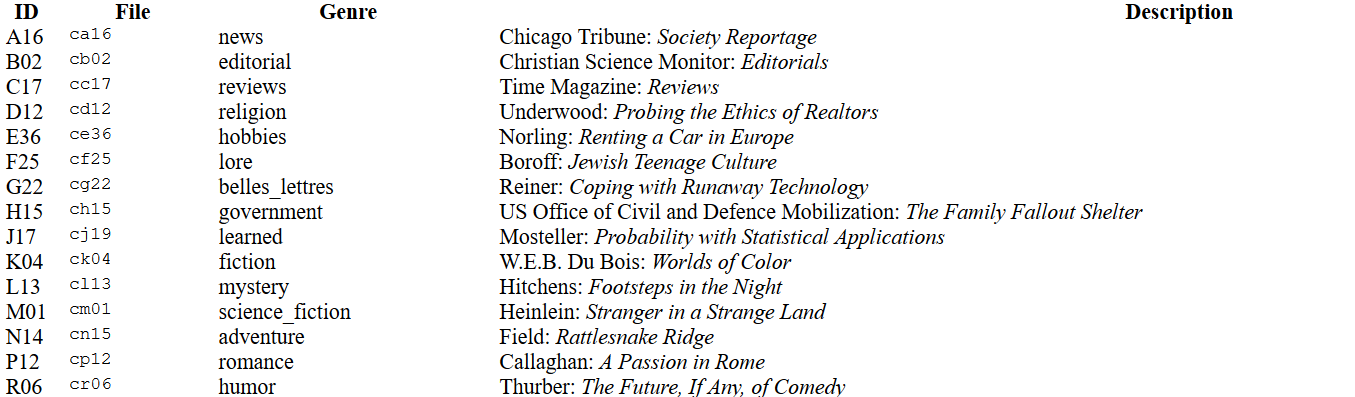 We can access corpus over list of sentences, sentences -list of words- or words.

In [0]:
nltk.download('brown')
from nltk.corpus import brown
print("Brown corpus, categories: ",brown.categories())
#you can also use fileid = ['cg113']
print("Words where category = mystery ", brown.words(categories='mystery')) 
print("Obtain sentances from categories specified with list: ", 
      brown.sents(categories=['mystery', 'editorial', 'reviews']))

news_text = brown.words(categories='news')
fdist = nltk.FreqDist(w.lower() for w in news_text)
modals = ['can', 'could', 'may', 'might', 'must', 'will']
for m in modals:
  #end ' ' modifies print statement so that each m will be printed in same line.
  print(m + ':', fdist[m], end=' ') 

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
Brown corpus, categories:  ['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']
Words where category = mystery  ['There', 'were', 'thirty-eight', 'patients', 'on', ...]
Obtain sentances from categories specified with list:  [['Assembly', 'session', 'brought', 'much', 'good'], ['The', 'General', 'Assembly', ',', 'which', 'adjourns', 'today', ',', 'has', 'performed', 'in', 'an', 'atmosphere', 'of', 'crisis', 'and', 'struggle', 'from', 'the', 'day', 'it', 'convened', '.'], ...]
can: 94 could: 87 may: 93 might: 38 must: 53 will: 389 

In the example above, we have also analyzed how many times can, could, may, might, must and will have occured in news texts. All capitalized characters are changed to lowercase to fit May, Must into same frequency distrubition index with may, must etc.

We can also obtain counts for each genre. Conditional Frequency distribution can be used for analyzing every category. These will be analyzed in detail within this notebook, it's only used to show that genres may affect most frequently used modal. Grammatical and preferential structures may be correlated to genre text is written for. 

In [0]:
cfd = nltk.ConditionalFreqDist((genre, word.lower()) 
                               for genre in brown.categories() 
                               for word in brown.words(categories=genre))
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfd.tabulate(conditions=genres, samples=modals)

                  can could   may might  must  will 
           news    94    87    93    38    53   389 
       religion    84    59    79    12    54    72 
        hobbies   276    59   143    22    84   269 
science_fiction    16    49     4    12     8    17 
        romance    79   195    11    51    46    49 
          humor    17    33     8     8     9    13 


**Your Turn:** Choose a different section of the Brown Corpus, and adapt the previous example to count a selection of wh words, such as what, when, where, who, and why.

In [0]:
# Try here

<h3>Reuters Corpus</h3>

The Reuters Corpus contains 10,788 news documents totaling 1.3 million words. The documents have been classified into 90 topics, and grouped into two sets, called "training" and "test". This split is for training and testing algorithms that automatically detect the topic of a document. Categories in Reuters Corpus, unlike Brown corpus, overlap with each other, since news actually contain multiple topics.

In [0]:
nltk.download('reuters')
from nltk.corpus import reuters

print("File idsin reuters corpus: ", reuters.fileids())
print("Categories in reuters corpus: ", reuters.categories())
print("Categories of a specific file, training 1421: ", 
      reuters.categories('training/1421'))
print("Categories of specific files given by a list: ",
      reuters.categories(['training/1421', 'training/8595']))
print("File ids that have specified category, Barley: ",
      reuters.fileids('barley')) #list can also inputted like example above

[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
File idsin reuters corpus:  ['test/14826', 'test/14828', 'test/14829', 'test/14832', 'test/14833', 'test/14839', 'test/14840', 'test/14841', 'test/14842', 'test/14843', 'test/14844', 'test/14849', 'test/14852', 'test/14854', 'test/14858', 'test/14859', 'test/14860', 'test/14861', 'test/14862', 'test/14863', 'test/14865', 'test/14867', 'test/14872', 'test/14873', 'test/14875', 'test/14876', 'test/14877', 'test/14881', 'test/14882', 'test/14885', 'test/14886', 'test/14888', 'test/14890', 'test/14891', 'test/14892', 'test/14899', 'test/14900', 'test/14903', 'test/14904', 'test/14907', 'test/14909', 'test/14911', 'test/14912', 'test/14913', 'test/14918', 'test/14919', 'test/14921', 'test/14922', 'test/14923', 'test/14926', 'test/14928', 'test/14930', 'test/14931', 'test/14932', 'test/14933', 'test/14934', 'test/14941', 'test/14943', 'test/14949', 'test/14951', 'test/14954', 't

Words, sentences can be obtained from categories and files. First words are mostly titles, they will be uppercased.

In [0]:
print(reuters.words('training/1421')[:14])
print(reuters.words(['training/10175','training/1421']))
print(reuters.words(categories=['barley', 'corn']))

['SWAP', 'DEALERS', 'UNVEIL', 'STANDARD', 'CONTRACT', 'The', 'International', 'Swap', 'Dealers', 'Association', 'has', 'developed', 'the', 'first']
['USDA', 'COMMENTS', 'ON', 'EXPORT', 'SALES', 'REPORT', ...]
['THAI', 'TRADE', 'DEFICIT', 'WIDENS', 'IN', 'FIRST', ...]


<h3>Inaugural Address Corpus</h3>

This corpus has been treated as text4 in chapter 1. However, the corpus is actually a collection of 55 texts, one for each presidential address. This collection also has a time dimension. 

In [0]:
nltk.download('inaugural')
from nltk.corpus import inaugural

print("\nInaugural Corpus file ids: ", inaugural.fileids())
print("\nTime dimension of Inaugural: ",
      [fileid[:4] for fileid in inaugural.fileids()])

[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!

Inaugural Corpus file ids:  ['1789-Washington.txt', '1793-Washington.txt', '1797-Adams.txt', '1801-Jefferson.txt', '1805-Jefferson.txt', '1809-Madison.txt', '1813-Madison.txt', '1817-Monroe.txt', '1821-Monroe.txt', '1825-Adams.txt', '1829-Jackson.txt', '1833-Jackson.txt', '1837-VanBuren.txt', '1841-Harrison.txt', '1845-Polk.txt', '1849-Taylor.txt', '1853-Pierce.txt', '1857-Buchanan.txt', '1861-Lincoln.txt', '1865-Lincoln.txt', '1869-Grant.txt', '1873-Grant.txt', '1877-Hayes.txt', '1881-Garfield.txt', '1885-Cleveland.txt', '1889-Harrison.txt', '1893-Cleveland.txt', '1897-McKinley.txt', '1901-McKinley.txt', '1905-Roosevelt.txt', '1909-Taft.txt', '1913-Wilson.txt', '1917-Wilson.txt', '1921-Harding.txt', '1925-Coolidge.txt', '1929-Hoover.txt', '1933-Roosevelt.txt', '1937-Roosevelt.txt', '1941-Roosevelt.txt', '1945-Roosevelt.txt', '1949-Truman.txt', '1953-Eisenhower.txt', 

Following exercise will show how "america" and "citizen" words have been used in this corpus. Uppercase beginnings will be transformed to lowercase. Graph shows count of usage by years.

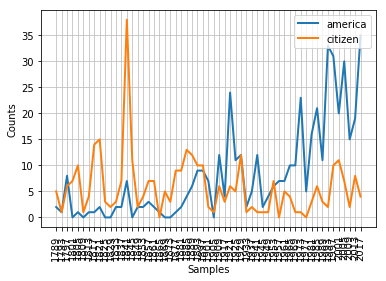

In [0]:
cfd = nltk.ConditionalFreqDist((target, fileid[:4])
                               for fileid in inaugural.fileids() 
                               for w in inaugural.words(fileid)
                               for target in ['america', 'citizen']
                               if w.lower().startswith(target))
cfd.plot()

<h3>Annotated Text Corpora</h3>

Not all applications of NLP work on raw input text data. Data needs to be annotated for some tasks that will be seen in further chapters. Text corpora may contain linguistic annotations, POS tags, named entities, syntatic structures, semantic roles etc. 
![Corporas offered by NLTK](https://scontent.fist2-3.fna.fbcdn.net/v/t1.15752-9/65247448_2311470972503855_2857934791389478912_n.png?_nc_cat=102&_nc_ht=scontent.fist2-3.fna&oh=39f6eaf3104269c4402e4fb9e962f583&oe=5D7CDE92)

<h3> Corpora in Other Languages</h3>

NLTK also offers corpora for other languages however some languages may need extra manipulation for character encodings. Commented lines in the code are for corpuses that have not been downloaded in this example. Downloading corpora can be done the same way as it had been for downloading books in Chapter 1. Unfortunately, not all languages have their corpora in NLTK, often because of insufficient support for language technologies.

In [0]:
nltk.download('udhr')
nltk.download('cess_esp')
nltk.download('indian')
nltk.download('floresta')

print("\nSpanish corpus words: ",nltk.corpus.cess_esp.words())
print("\nFloresta corpus words: ",nltk.corpus.floresta.words())
print("\nIndian corpus words: ", nltk.corpus.indian.words('hindi.pos'))
print("\nUniversal Declaration of Human Rights corpora words: ",
      nltk.corpus.udhr.fileids())
print("\nJavanese words from UDHR corpora: ", 
      nltk.corpus.udhr.words('Javanese-Latin1')[1:])


[nltk_data] Downloading package udhr to /root/nltk_data...
[nltk_data]   Package udhr is already up-to-date!
[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!
[nltk_data] Downloading package indian to /root/nltk_data...
[nltk_data]   Package indian is already up-to-date!
[nltk_data] Downloading package floresta to /root/nltk_data...
[nltk_data]   Package floresta is already up-to-date!

Spanish corpus words:  ['El', 'grupo', 'estatal', 'Electricité_de_France', ...]

Floresta corpus words:  ['Um', 'revivalismo', 'refrescante', 'O', '7_e_Meio', ...]

Indian corpus words:  ['पूर्ण', 'प्रतिबंध', 'हटाओ', ':', 'इराक', 'संयुक्त', ...]

Universal Declaration of Human Rights corpora words:  ['Abkhaz-Cyrillic+Abkh', 'Abkhaz-UTF8', 'Achehnese-Latin1', 'Achuar-Shiwiar-Latin1', 'Adja-UTF8', 'Afaan_Oromo_Oromiffa-Latin1', 'Afrikaans-Latin1', 'Aguaruna-Latin1', 'Akuapem_Twi-UTF8', 'Albanian_Shqip-Latin1', 'Amahuaca', 'Amahuaca-Latin1'

Let's calculate word lengths for different languages using Universal Declaration of Human Rights corpora.

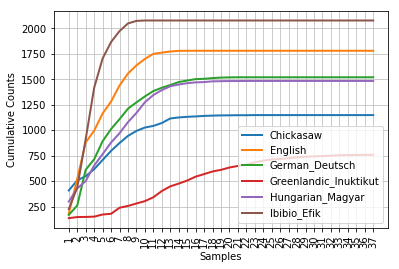

In [0]:
from nltk.corpus import udhr
languages = ['Chickasaw', 'English', 'German_Deutsch','Greenlandic_Inuktikut', 
             'Hungarian_Magyar', 'Ibibio_Efik']
cfd = nltk.ConditionalFreqDist((lang, len(word))
                               for lang in languages 
                               for word in udhr.words(lang + '-Latin1'))
cfd.plot(cumulative=True)

**Your Turn:** Pick a language of interest in udhr.fileids(), and define a variable raw_text = udhr.raw(Language-Latin1). Now plot a frequency distribution of the letters of the text using nltk.FreqDist(raw_text).plot().

In [0]:
# Try here

<h3>Text Corpus Structure</h3>
We have seen different corpus structures, from corpora with no structure, made of text to corpora seperated into categories, file ids, genre... Texts are grouped into categories that might correspond to genre, source, author, language, etc. Sometimes these categories overlap, notably in the case of topical categories as a text can be relevant to more than one topic.

![Corpora structures](https://scontent.fist2-3.fna.fbcdn.net/v/t1.15752-9/64461240_382612902604294_6085668865419771904_n.png?_nc_cat=104&_nc_ht=scontent.fist2-3.fna&oh=e6b85552436bb996e6a77843e63d7b58&oe=5D801804)

Basic corpus functionalities are given in the next figure, more documentation can be found using help(nltk.corpus.reader) and by reading the online Corpus HOWTO at http://nltk.org/howto. 
![Corpora functionality](https://scontent.fist2-3.fna.fbcdn.net/v/t1.15752-9/64782886_1865293523570654_896995604712914944_n.png?_nc_cat=104&_nc_ht=scontent.fist2-3.fna&oh=2086a973573ea8930796ffe2710d6458&oe=5D944751)

In [0]:
raw = gutenberg.raw("burgess-busterbrown.txt")
print("First 20 characters: ", raw[1:20])
words = gutenberg.words("burgess-busterbrown.txt")
print("First 20 words: ", words[1:20])
sents = gutenberg.sents("burgess-busterbrown.txt")
print("First 20 sentences: ", sents[1:20])

First 20 characters:  The Adventures of B
First 20 words:  ['The', 'Adventures', 'of', 'Buster', 'Bear', 'by', 'Thornton', 'W', '.', 'Burgess', '1920', ']', 'I', 'BUSTER', 'BEAR', 'GOES', 'FISHING', 'Buster', 'Bear']
First 20 sentences:  [['I'], ['BUSTER', 'BEAR', 'GOES', 'FISHING'], ['Buster', 'Bear', 'yawned', 'as', 'he', 'lay', 'on', 'his', 'comfortable', 'bed', 'of', 'leaves', 'and', 'watched', 'the', 'first', 'early', 'morning', 'sunbeams', 'creeping', 'through', 'the', 'Green', 'Forest', 'to', 'chase', 'out', 'the', 'Black', 'Shadows', '.'], ['Once', 'more', 'he', 'yawned', ',', 'and', 'slowly', 'got', 'to', 'his', 'feet', 'and', 'shook', 'himself', '.'], ['Then', 'he', 'walked', 'over', 'to', 'a', 'big', 'pine', '-', 'tree', ',', 'stood', 'up', 'on', 'his', 'hind', 'legs', ',', 'reached', 'as', 'high', 'up', 'on', 'the', 'trunk', 'of', 'the', 'tree', 'as', 'he', 'could', ',', 'and', 'scratched', 'the', 'bark', 'with', 'his', 'great', 'claws', '.'], ['After', 'that', 'he', 'yawne

<h3>Loading your own Corpus</h3>
If you have your own text files and you want to benefit from functions above, you can easily load your own corpus by using NLTK's PlaintextCorpusReader.For this example our file is located in directory /usr/share/dict. You should also check your directory before using. Set your location as corpus root. Other parameter of PlaintextCorpusReader initializer can be list of file ids ['a.txt', 'test/b.txt'] or a pattern written using regular expressions (Regexes will be explained in more detail in chapter 3).



```
from nltk.corpus import PlaintextCorpusReader

corpus_root = '/usr/share/dict' 
wordlists = PlaintextCorpusReader(corpus_root, '.*')
wordlists.fileids()
wordlists.words('connectives')
```


```
from nltk.corpus import BracketParseCorpusReader

corpus_root = r"C:\corpora\penntreebank\parsed\mrg\wsj" #location of the parsed Wall Street Journal component of the corpus
file_pattern = r".*/wsj_.*\.mrg" #file_pattern that matches the files contained within its subfolders 
ptb = BracketParseCorpusReader(corpus_root, file_pattern)
print(ptb.fileids())
print(len(ptb.sents()))
print(ptb.sents(fileids='20/wsj_2013.mrg'))
```





If you have your own copy of Penn Treebank in C:\corpora. BracketParseCorpusReader can be used to access this corpus. 

<h2>2. Conditional Frequency Distributions </h2>

Here we will establish more concepts related to occurence of items in the list.

<h3> Conditions and Events </h3>

A distribution of frequencies counts observable occurrences, such as word appearance in a text. A conditional distribution of frequencies requires to pair a situation with each case. So we have to process a series of pairs instead of processing a sequence of phrases. Here's an example:


In [0]:
#processing only sequence of words
text = ['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]  

#processing sequence of pairs
pairs = [('news', 'The'), ('news', 'Fulton'), ('news', 'County'), ...]  

The form (condition, event) is available for each pair. There would be 15 terms (one per genre) and 1,161,192 occurrences (one per phrase) if we were to process the entire Brown Corpus by genre.

<h3>Counting Words by Genre</h3>

In first part,  we saw a conditional frequency distribution where the condition was the section of the Brown Corpus, and for each condition we counted words. ConditionalFreqDist() takes a list of pairs.

In [0]:
nltk.download('brown')
from nltk.corpus import brown
cfd = nltk.ConditionalFreqDist(
          (genre, word)    # ConditionalFreqDist() takes a list of pairs
          for genre in brown.categories()
          for word in brown.words(categories=genre))

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


Let's see a break down example using two genres. News and romance.

1.   We loop over every word in the genre
2.   Producing pairs consisting of the genre and the word



In [0]:

genre_word = [(genre, word) 
              #we loop over every word in the genre
              for genre in ['news', 'romance']
              #producing pairs consisting of the genre and the word
              for word in brown.words(categories=genre)] 
len(genre_word)

170576

Here we will see that genre_word in the beginning are news and words and next is the romance and words.

In [0]:
#pairs at the beginning of the list genre_word will be of the form('news', word)
print(genre_word[:4]) 
#at the end will be of the form ('romance', word)
print(genre_word[-4:])  


[('news', 'The'), ('news', 'Fulton'), ('news', 'County'), ('news', 'Grand')]
[('romance', 'afraid'), ('romance', 'not'), ('romance', "''"), ('romance', '.')]


Now we can use this pair list to generate and save a ConditionalFreqDist in a cfd variable. We can type the variable name as normal to check it and verify both conditions.

In [0]:
cfd = nltk.ConditionalFreqDist(genre_word)
print(cfd)
print(cfd.conditions())


<ConditionalFreqDist with 2 conditions>
['news', 'romance']


Let's work the two conditions and establish that it is Frequency Distribution.

In [0]:
print(cfd['news'])
print(cfd['romance'])
print(cfd['romance'].most_common(20))
print(cfd['romance']['could'])

<FreqDist with 14394 samples and 100554 outcomes>
<FreqDist with 8452 samples and 70022 outcomes>
[(',', 3899), ('.', 3736), ('the', 2758), ('and', 1776), ('to', 1502), ('a', 1335), ('of', 1186), ('``', 1045), ("''", 1044), ('was', 993), ('I', 951), ('in', 875), ('he', 702), ('had', 692), ('?', 690), ('her', 651), ('that', 583), ('it', 573), ('his', 559), ('she', 496)]
193


<h3>Plotting and Tabulating Distributions</h3>

In addition to combining two or more frequency distributions and being simple to initialize, a ConditionalFreqDist offers some helpful tabulation and plotting techniques.

**Example 1**

The condition is either of the words america or citizen , and the counts being plotted are the number of times the word occured in a particular speech. For example, ('america', '1995').

In [0]:
nltk.download('inaugural')
from nltk.corpus import inaugural
cfd = nltk.ConditionalFreqDist((target, fileid[:4]) 
                               for fileid in inaugural.fileids() 
                               for w in inaugural.words(fileid) 
                               for target in ['america', 'citizen'] 
if w.lower().startswith(target))
print()
print(cfd['america'].most_common(50))
print(cfd['citizen'].most_common(50))

[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!

[('2017', 35), ('1993', 33), ('1997', 31), ('2005', 30), ('1921', 24), ('1973', 23), ('1985', 21), ('2001', 20), ('2013', 19), ('1981', 16), ('2009', 15), ('1909', 12), ('1929', 12), ('1941', 12), ('1925', 11), ('1989', 11), ('1965', 10), ('1969', 10), ('1893', 9), ('1897', 9), ('1797', 8), ('1841', 7), ('1901', 7), ('1957', 7), ('1961', 7), ('1889', 6), ('1953', 6), ('1937', 5), ('1977', 5), ('1885', 4), ('1917', 4), ('1949', 4), ('1857', 3), ('1789', 2), ('1821', 2), ('1833', 2), ('1837', 2), ('1849', 2), ('1853', 2), ('1861', 2), ('1881', 2), ('1933', 2), ('1945', 2), ('1793', 1), ('1805', 1), ('1813', 1), ('1817', 1), ('1865', 1), ('1877', 1)]
[('1841', 38), ('1821', 15), ('1817', 14), ('1885', 13), ('1889', 12), ('1929', 12), ('1845', 11), ('2001', 11), ('1805', 10), ('1893', 10), ('1897', 10), ('1997', 10), ('1877', 9), ('1881', 9), ('2013', 8), ('1801', 7), ('1

**Example 2**

Here's another example using languages names.

In [0]:
nltk.download('udhr')
from nltk.corpus import udhr

'''The condition is the name of the language and 
the counts being plotted are derived from word lengths'''

languages = ['Chickasaw', 'English', 'German_Deutsch','Greenlandic_Inuktikut',
             'Hungarian_Magyar', 'Ibibio_Efik'] 
cfd = nltk.ConditionalFreqDist((lang, len(word)) 
                               for lang in languages 
                               for word in udhr.words(lang + '-Latin1'))


[nltk_data] Downloading package udhr to /root/nltk_data...
[nltk_data]   Package udhr is already up-to-date!


**Plot and tabulate methods**

Optionally, we can indicate which circumstances to show with a conditions= parameter in the plot) (and tabulate) (techniques. We get all the circumstances when we omit it. Using sample=parameter allows a big amount of information to be loaded into a conditional frequency distribution and then explored by plotting or tabulating chosen circumstances and samples. It also provides us complete control in any display of the order of circumstances and samples.

In [0]:
 cfd.tabulate(conditions=['English', 'German_Deutsch'],
              samples=range(10), cumulative=True)  
 '''we can limit the samples to display with a samples= parameter
 specify which conditions to display with a conditions= parameter.'''

                  0    1    2    3    4    5    6    7    8    9 
       English    0  185  525  883  997 1166 1283 1440 1558 1638 
German_Deutsch    0  171  263  614  717  894 1013 1110 1213 1275 


'we can limit the samples to display with a samples= parameter\nspecify which conditions to display with a conditions= parameter.'

**Result**

We only tabulated the cumulative frequency information for two languages and less than 10 characters for phrases. We interpreted the last cell in the top row to imply that the English text contains 1,638 phrases with 9 letters or less.

**Practise**

**Your Turn** Working with the news and romance genres from the Brown Corpus, find out which days of the week are most newsworthy, and which are most romantic. Define a variable called days containing a list of days of the week, i.e. ['Monday', ...]. Now tabulate the counts for these words using cfd.tabulate(samples=days). Now try the same thing using plot in place of tabulate. You may control the output order of days with the help of an extra parameter: samples=['Monday', ...].

In [0]:
# Try here

<h3>Generating Random Text with Bigrams</h3>

To generate a bigrams table (word pairs), we can use a conditional frequency distribution. (We introduced bigrams in 3.) Bigrams) (takes a word list and creates a list of successive word pairs. Remember to use the list) (feature to see the outcome and not a cryptic "generator object":

In [0]:
sent = ['In', 'the', 'beginning', 'God', 'created', 'the', 'heaven',
   'and', 'the', 'earth', '.']
list(nltk.bigrams(sent))

[('In', 'the'),
 ('the', 'beginning'),
 ('beginning', 'God'),
 ('God', 'created'),
 ('created', 'the'),
 ('the', 'heaven'),
 ('heaven', 'and'),
 ('and', 'the'),
 ('the', 'earth'),
 ('earth', '.')]

**Result**

This easy strategy to text generation, as you can see by checking the output, tends to get stuck in loops ; another technique would be to randomly select the next word from among the accessible words.

**Generating Random Text**

This program obtains all bigrams from the text of the book of Genesis and then builds a conditional frequency distribution to record which words are most likely to follow a particular word.  For example after 'living' the most common word used such as 'creature' will be generated by the program below:

In [0]:
nltk.download('genesis')

#The function generate_model() contains a simple loop to generate text.
def generate_model(cfdist, word, num=15):  
  for i in range(num):
    print(word, end=' ')
    word = cfdist[word].max()
    
text = nltk.corpus.genesis.words('english-kjv.txt')
bigrams = nltk.bigrams(text)
cfd = nltk.ConditionalFreqDist(bigrams)

[nltk_data] Downloading package genesis to /root/nltk_data...
[nltk_data]   Package genesis is already up-to-date!


**Conditional frequency distributions methods**

![alt text](https://scontent.fist2-3.fna.fbcdn.net/v/t1.15752-9/64466101_365327660839968_6881837063432306688_n.png?_nc_cat=106&_nc_ht=scontent.fist2-3.fna&oh=cd58b04a9ddda7ee4adbc9686dcfe3dd&oe=5D7FF2AB)

<h2>3. More Python: Reusing Code</h2>
<h3>Functions</h3>

Rather than repeating the same code several times over, it is more efficient and reliable to localize this work inside a **function**. A function is just a named block of code that performs some well-defined task. A function is usually defined to take some inputs, using special variables known as **parameters**, and it may produce a result, also known as a **return value**. We define a function using the keyword def followed by the function name and any input parameters, followed by the body of the function.

In [0]:
from __future__ import division   # if you are using Python 2, add this line
def lexical_diversity(text):
    return len(text) / len(set(text))

Here's an equivalent definition which does the same work using multiple lines of code. We'll change the parameter name from `text` to `my_text_data` to remind you that this is an arbitrary choice:

In [0]:
def lexical_diversity(my_text_data):
    word_count = len(my_text_data) 
    vocab_size = len(set(my_text_data))
    diversity_score = vocab_size / word_count
    return diversity_score

Notice that we've created some new variables inside the body of the function. These are **local variables** and are not accessible outside the function. So now we have defined a function with the name `lexical_diversity`. But just defining it won't produce any output! Functions do nothing until they are "called" (or "invoked"):

In [0]:
from nltk.corpus import genesis
kjv = genesis.words('english-kjv.txt')
lexical_diversity(kjv)


0.06230453042623537

Let's define a simple function to work out English plurals. The function  `plural()` takes a singular noun and generates a plural form, though it is not always correct.

In [0]:
def plural(word):
    if word.endswith('y'):
        return word[:-1] + 'ies'
    elif word[-1] in 'sx' or word[-2:] in ['sh', 'ch']:
        return word + 'es'
    elif word.endswith('an'):
        return word[:-2] + 'en'
    else:
        return word + 's'
    
print("Plural form of fairy is:", plural("fairy"))
print("Plural form of woman is:", plural("woman"))



Plural form of fairy is: fairies
Plural form of woman is: women


<h3>Modules</h3>
Over time you will find that you create a variety of useful little text processing functions, and you end up copying them from old programs to new ones. It makes life a lot easier if you can collect your work into a single place, and access previously defined functions without making copies.

To do this, save your function(s) in a file called (say) text_proc.py. Now, you can access your work simply by importing it from the file:



```
from text_proc import plural
```

And than you can call your function as previously done:



```
plural("fairy")
```






<h2>4 Lexical Resources</h2>

* A **lexicon**, or **lexical** **resource**, is a collection of words and/or phrases along with associated information such as part of speech and sense definitions. Lexical resources are secondary to texts, and are usually created and enriched with the help of texts.

* A lexical entry consists of a **headword** (also known as a **lemma**) along with additional information such as the part of speech and the sense definition. Two distinct words having the same spelling are called **homonyms**.

![alt text](https://i.hizliresim.com/yGP93k.png)

<h3>Wordlist Corpora</h3>

* The Words Corpus is the  */usr/share/dict/words* file from Unix, used by some spell checkers.
* We can use it to find unusual or mis-spelt words in a text corpus, as shown in below.

In [0]:
# This function computes the vocabulary of a text, 
# then removes all items that occur in an existing wordlist, 
# leaving just the uncommon or mis-spelt words.
def unusual_words(text):
    text_vocab = set(w.lower() for w in text if w.isalpha())
    english_vocab = set(w.lower() for w in nltk.corpus.words.words())
    unusual = text_vocab - english_vocab
    return sorted(unusual)


In [0]:
nltk.download('words')
# Example for function unusual_words which is written above
unusual_words(nltk.corpus.gutenberg.words('austen-sense.txt'))

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


['abbeyland',
 'abhorred',
 'abilities',
 'abounded',
 'abridgement',
 'abused',
 'abuses',
 'accents',
 'accepting',
 'accommodations',
 'accompanied',
 'accounted',
 'accounts',
 'accustomary',
 'aches',
 'acknowledging',
 'acknowledgment',
 'acknowledgments',
 'acquaintances',
 'acquiesced',
 'acquitted',
 'acquitting',
 'acted',
 'actions',
 'adapted',
 'adding',
 'additions',
 'addressed',
 'addresses',
 'addressing',
 'adhering',
 'adieus',
 'adjusting',
 'administering',
 'admirers',
 'admires',
 'admitting',
 'adorned',
 'advances',
 'advantages',
 'affairs',
 'affections',
 'affects',
 'affixed',
 'afflictions',
 'afforded',
 'affording',
 'ages',
 'agitated',
 'agonies',
 'ailments',
 'aimed',
 'alarms',
 'alienated',
 'alighted',
 'alleged',
 'allenham',
 'allowances',
 'allowed',
 'allowing',
 'alluded',
 'alterations',
 'altered',
 'altering',
 'amended',
 'amounted',
 'amusements',
 'ankles',
 'annamaria',
 'annexed',
 'announced',
 'announcing',
 'annuities',
 'annum',
 

In [0]:
# Another example for function unusual_words which is written above
unusual_words(nltk.corpus.nps_chat.words())

['aaaaaaaaaaaaaaaaa',
 'aaahhhh',
 'abortions',
 'abou',
 'abourted',
 'abs',
 'ack',
 'acros',
 'actualy',
 'adams',
 'adds',
 'adduser',
 'adjusts',
 'adoted',
 'adreniline',
 'ads',
 'adults',
 'afe',
 'affairs',
 'affari',
 'affects',
 'afk',
 'agaibn',
 'ages',
 'aggravated',
 'agurlwithbigguns',
 'ahah',
 'ahahah',
 'ahahh',
 'ahahha',
 'ahh',
 'ahhah',
 'ahhahahaha',
 'ahhh',
 'ahhhh',
 'ahhhhhh',
 'ahhhhhhhhhhhhhh',
 'aiiiiiiiiiiiiiiiiiiiiiiii',
 'aiken',
 'aime',
 'akdt',
 'akon',
 'akron',
 'akst',
 'aligator',
 'allergies',
 'allo',
 'allowed',
 'aloha',
 'alohaaa',
 'alohas',
 'alot',
 'alotta',
 'alternatives',
 'alterz',
 'alwys',
 'alzheimers',
 'amazingness',
 'americans',
 'anithing',
 'ans',
 'answering',
 'answers',
 'antidepressants',
 'anygirl',
 'anymore',
 'anythin',
 'anytime',
 'anyyyyyyyyyyyyyyyyy',
 'aok',
 'apoligize',
 'appearently',
 'appears',
 'applaudes',
 'appleton',
 'appologise',
 'appologize',
 'aqwesome',
 'arggghhh',
 'argh',
 'armtnpeat',
 'arres

**Stopword Corpus**

**Stopwords**  is high-frequency words like *the*, *to* and *also* . Stopwords usually have little lexical content, and their presence in a text fails to distinguish it from other texts. 

In [0]:
nltk.download('stopwords')

from nltk.corpus import stopwords

stopwords.words('english') # You can change the language, e.g Turkish or German

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [0]:
# Function to compute what fraction of words in a text are not in the 
# stopwords list. Combined two different kinds of corpus here, 
# using a lexical resource to filter the content of a text corpus.

def content_fraction(text):
  stopwords = nltk.corpus.stopwords.words('english')
  content = [w for w in text if w.lower() not in stopwords]
  return len(content) / len(text)


content_fraction(nltk.corpus.reuters.words()) # using Reuters Corpus

0.735240435097661

Wordlists are useful for solving puzzles such as described below.

![alt text](https://i.hizliresim.com/5N8z6q.png)

In [0]:
# This program iterates through every word and, for each one, 
# checks whether it meets the conditions

puzzle_letters = nltk.FreqDist('egivrvonl')
obligatory = 'r' # r must be in the word
wordlist = nltk.corpus.words.words()
puzzle_solution = [w for w in wordlist if len(w) >= 4 and obligatory in w
                     and nltk.FreqDist(w) <= puzzle_letters]

print(len(puzzle_solution))
# We should check that candidate solutions only use combinations of 
# the supplied letters, especially since some of the supplied letters 
# appear twice. FreqDist comparison method permits us to check that 
# the frequency of each letter in the candidate word is less than or equal to 
# the frequency of the corresponding letter in the puzzle.

92


**Names Corpus**

* Containing 8,000 first names categorized by gender. 
* The male and female names are stored in separate files. 

In [0]:
# Finding names which are appear in both male and female files.
nltk.download('names')
names = nltk.corpus.names

names.fileids()

male_names = names.words('male.txt')
female_names = names.words('female.txt')

[w for w in male_names if w in female_names]

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!


['Abbey',
 'Abbie',
 'Abby',
 'Addie',
 'Adrian',
 'Adrien',
 'Ajay',
 'Alex',
 'Alexis',
 'Alfie',
 'Ali',
 'Alix',
 'Allie',
 'Allyn',
 'Andie',
 'Andrea',
 'Andy',
 'Angel',
 'Angie',
 'Ariel',
 'Ashley',
 'Aubrey',
 'Augustine',
 'Austin',
 'Averil',
 'Barrie',
 'Barry',
 'Beau',
 'Bennie',
 'Benny',
 'Bernie',
 'Bert',
 'Bertie',
 'Bill',
 'Billie',
 'Billy',
 'Blair',
 'Blake',
 'Bo',
 'Bobbie',
 'Bobby',
 'Brandy',
 'Brett',
 'Britt',
 'Brook',
 'Brooke',
 'Brooks',
 'Bryn',
 'Cal',
 'Cam',
 'Cammy',
 'Carey',
 'Carlie',
 'Carlin',
 'Carmine',
 'Carroll',
 'Cary',
 'Caryl',
 'Casey',
 'Cass',
 'Cat',
 'Cecil',
 'Chad',
 'Chris',
 'Chrissy',
 'Christian',
 'Christie',
 'Christy',
 'Clair',
 'Claire',
 'Clare',
 'Claude',
 'Clem',
 'Clemmie',
 'Cody',
 'Connie',
 'Constantine',
 'Corey',
 'Corrie',
 'Cory',
 'Courtney',
 'Cris',
 'Daffy',
 'Dale',
 'Dallas',
 'Dana',
 'Dani',
 'Daniel',
 'Dannie',
 'Danny',
 'Darby',
 'Darcy',
 'Darryl',
 'Daryl',
 'Deane',
 'Del',
 'Dell',
 'Deme

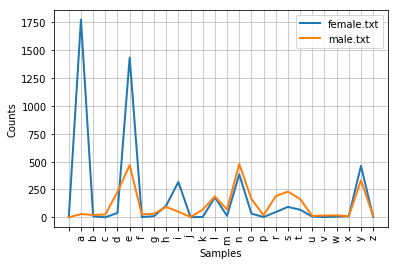

In [0]:
# Names ending in the letter a are almost always female.
# Outcome of this program can show us this and other patterns.

cfd = nltk.ConditionalFreqDist(
    (fileid, name[-1]) # Remember name[-1] is the last letter of the name
    for fileid in names.fileids()
    for name in names.words(fileid))


cfd.plot()

<h3>A Pronouncing Dictionary</h3>

A slightly richer kind of lexical resource is a table (or spreadsheet), containing a word plus some properties in each row. NLTK includes the CMU Pronouncing Dictionary for US English, which was designed for use by speech synthesizers.


In [0]:
# Showing the example entries of CMU Pronouncing Dictionary
nltk.download('cmudict')

entries = nltk.corpus.cmudict.entries() # cmudict for CMU Pronouncing Dictionary

print('Number of entries in CMU Pronouncing Dictionary: ', len(entries))

for entry in entries[42371:42379]: # You can change the interval
  print(entry)

[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!
Number of entries in CMU Pronouncing Dictionary:  133737
('fir', ['F', 'ER1'])
('fire', ['F', 'AY1', 'ER0'])
('fire', ['F', 'AY1', 'R'])
('firearm', ['F', 'AY1', 'ER0', 'AA2', 'R', 'M'])
('firearm', ['F', 'AY1', 'R', 'AA2', 'R', 'M'])
('firearms', ['F', 'AY1', 'ER0', 'AA2', 'R', 'M', 'Z'])
('firearms', ['F', 'AY1', 'R', 'AA2', 'R', 'M', 'Z'])
('fireball', ['F', 'AY1', 'ER0', 'B', 'AO2', 'L'])


For each word, this lexicon provides a list of phonetic codes — distinct labels for each contrastive sound — known as *phones*.

The symbols in the CMU Pronouncing Dictionary are from the Arpabet, described in more detail at  http://en.wikipedia.org/wiki/Arpabet

Each entry consists of two parts, and we can process these individually by writing *word, pron* instead of 
*entry* like we used in the above example (word, pron and entry are just variable names not types).

In [0]:
'''Each time through the loop word is assigned the first part of the entry, 
and pron is assigned the second part of the entry'''
for word, pron in entries:
  # looking for entries whose pronunciation consists of 3 phones
  if len(pron) == 3:
    # assign pron to 3 different variables
    ph1, ph2, ph3 = pron 
    # You can change ph1 and ph3 to see different words.
    if ph1 == 'P' and ph3 == 'T': 
      print(word, ph2, end=' ')

pait EY1 pat AE1 pate EY1 patt AE1 peart ER1 peat IY1 peet IY1 peete IY1 pert ER1 pet EH1 pete IY1 pett EH1 piet IY1 piette IY1 pit IH1 pitt IH1 pot AA1 pote OW1 pott AA1 pout AW1 puett UW1 purt ER1 put UH1 putt AH1 

Another example of the same for statement, this time used inside a list comprehension. This program finds all words whose pronunciation ends with a syllable sounding like *nicks.* You could use this method to find rhyming words.

In [0]:
syllable = ['N', 'IH0', 'K', 'S']
# Checks last 4 syllables.
print([word for word, pron in entries if pron[-4:] == syllable])

'''One pronunciation is spelt in several ways: 
*nics*, *niks*, *nix*, even *ntic's* with a silent t, 
for the word *atlantic's*.'''

["atlantic's", 'audiotronics', 'avionics', 'beatniks', 'calisthenics', 'centronics', 'chamonix', 'chetniks', "clinic's", 'clinics', 'conics', 'conics', 'cryogenics', 'cynics', 'diasonics', "dominic's", 'ebonics', 'electronics', "electronics'", "endotronics'", 'endotronics', 'enix', 'environics', 'ethnics', 'eugenics', 'fibronics', 'flextronics', 'harmonics', 'hispanics', 'histrionics', 'identics', 'ionics', 'kibbutzniks', 'lasersonics', 'lumonics', 'mannix', 'mechanics', "mechanics'", 'microelectronics', 'minix', 'minnix', 'mnemonics', 'mnemonics', 'molonicks', 'mullenix', 'mullenix', 'mullinix', 'mulnix', "munich's", 'nucleonics', 'onyx', 'organics', "panic's", 'panics', 'penix', 'pennix', 'personics', 'phenix', "philharmonic's", 'phoenix', 'phonics', 'photronics', 'pinnix', 'plantronics', 'pyrotechnics', 'refuseniks', "resnick's", 'respironics', 'sconnix', 'siliconix', 'skolniks', 'sonics', 'sputniks', 'technics', 'tectonics', 'tektronix', 'telectronics', 'telephonics', 'tonics', 'un

"One pronunciation is spelt in several ways: \n*nics*, *niks*, *nix*, even *ntic's* with a silent t, \nfor the word *atlantic's*."

Let's look for some other mismatches between pronunciation and writing. Can you summarize the purpose of the following examples and explain how they work?

In [0]:
[w for w, pron in entries if pron[-1] == 'M' and w[-1] == 'n']

['autumn', 'column', 'condemn', 'damn', 'goddamn', 'hymn', 'solemn']

In [0]:
sorted(set(w[:2] for w, pron in entries if pron[0] == 'N' and w[0] != 'n'))

['gn', 'kn', 'mn', 'pn']

The phones contain digits to represent primary stress (1), secondary stress (2) and no stress (0).



In [0]:
'''We define a function to extract the stress digits and then scan our lexicon 
to find words having a particular stress pattern.'''
def stress(pron):
  return [char for phone in pron for char in phone if char.isdigit()]

print('First example: ', 
      [w for w, pron in entries if stress(pron) == ['0', '1', '0', '2', '0']])

print('Second example: ', 
      [w for w, pron in entries if stress(pron) == ['0', '2', '0', '1', '0']])


First example:  ['abbreviated', 'abbreviated', 'abbreviating', 'accelerated', 'accelerating', 'accelerator', 'accelerators', 'accentuated', 'accentuating', 'accommodated', 'accommodating', 'accommodative', 'accumulated', 'accumulating', 'accumulative', 'accumulator', 'accumulators', 'accusatory', 'adenovirus', 'adjudicated', 'adjudicating', 'administrating', 'administrative', 'administrator', "administrators'", "administrator's", 'administrators', 'adulterated', 'adventurism', 'adventurism', 'affiliated', 'affiliated', "affiliated's", 'affiliating', 'alleviated', 'alleviated', 'alleviating', 'alliteration', 'alliterative', 'amalgamated', "amalgamated's", 'amalgamating', 'ameliorated', 'ameridata', 'amoxicillin', 'anachronism', 'anachronisms', 'annihilated', 'annihilating', 'antagonism', 'antagonisms', 'antagonizing', 'anticipated', 'anticipated', 'anticipating', 'apologizes', 'apologizing', 'apothecary', 'appreciated', 'appreciating', 'appreciative', 'appropriated', 'appropriating', 'a

We can use a conditional frequency distribution to help us find minimally-contrasting sets of words. 

In [0]:
'''Find p-words consisting of 3 sounds and group them 
according to their first and last sounds.'''

p3 = [(pron[0]+'-'+pron[2], word)
      for (word, pron) in entries
      if pron[0] == 'P' and len(pron) == 3] 


cfd = nltk.ConditionalFreqDist(p3)
for template in sorted(cfd.conditions()):
  if len(cfd[template]) > 10:
    words = sorted(cfd[template])
    wordstring = ' '.join(words)
    print(template, wordstring[:70] + "...")

P-CH patch pautsch peach perch petsch petsche piche piech pietsch pitch pit...
P-K pac pack paek paik pak pake paque peak peake pech peck peek perc perk ...
P-L pahl pail paille pal pale pall paul paule paull peal peale pearl pearl...
P-N paign pain paine pan pane pawn payne peine pen penh penn pin pine pinn...
P-P paap paape pap pape papp paup peep pep pip pipe pipp poop pop pope pop...
P-R paar pair par pare parr pear peer pier poor poore por pore porr pour...
P-S pace pass pasts peace pearse pease perce pers perse pesce piece piss p...
P-T pait pat pate patt peart peat peet peete pert pet pete pett piet piett...
P-UW1 peru peugh pew plew plue prew pru prue prugh pshew pugh...
P-Z p's p.'s p.s pais paiz pao's pas pause paws pays paz peas pease pei's ...


Rather than iterating over the whole dictionary, we can also access it by looking up particular words.

In [0]:
# Python's dictionary data structure is used.
prondict = nltk.corpus.cmudict.dict()

prondict['fire']

[['F', 'AY1', 'ER0'], ['F', 'AY1', 'R']]

If we try to look up a non-existent key, we get a **KeyError**. We can assign a value for the key(it has no effect on NLTK corpus).


In [0]:
prondict['languageprocessing']


KeyError: ignored

In [0]:
prondict['languageprocessing'] = [[ 'L', 'AE1', 'NG', 'G', 'W','AH0', 'JH',
                                 'P', 'R', 'AA1', 'S', 'EH0', 'S', 'IH0', 'NG']]
  
prondict['languageprocessing']


[['L',
  'AE1',
  'NG',
  'G',
  'W',
  'AH0',
  'JH',
  'P',
  'R',
  'AA1',
  'S',
  'EH0',
  'S',
  'IH0',
  'NG']]

We can use any lexical resource to process a text, e.g., to filter out words having some lexical property (like nouns), or mapping every word of the text.

In [0]:
text = ['natural', 'language', 'processing']
[ph for w in text for ph in prondict[w][0]]

['N',
 'AE1',
 'CH',
 'ER0',
 'AH0',
 'L',
 'L',
 'AE1',
 'NG',
 'G',
 'W',
 'AH0',
 'JH',
 'P',
 'R',
 'AA1',
 'S',
 'EH0',
 'S',
 'IH0',
 'NG']

<h3>Comparative Wordlists</h3>

NLTK includes so-called Swadesh wordlists, lists of about 200 common words in several languages. The languages are identified using an ISO 639 two-letter code.

Information about ISO 639: https://www.loc.gov/standards/iso639-2/php/code_list.php

In [0]:
nltk.download('swadesh')
from nltk.corpus import swadesh

print('\nFile IDs:', swadesh.fileids())

print('\nEnglish words: ', swadesh.words('nl')) # You can try other languages.

[nltk_data] Downloading package swadesh to /root/nltk_data...
[nltk_data]   Package swadesh is already up-to-date!

File IDs: ['be', 'bg', 'bs', 'ca', 'cs', 'cu', 'de', 'en', 'es', 'fr', 'hr', 'it', 'la', 'mk', 'nl', 'pl', 'pt', 'ro', 'ru', 'sk', 'sl', 'sr', 'sw', 'uk']

English words:  ['ik', 'jij, je, U', 'hij', 'wij, we', 'jullie', 'zij, ze', 'deze, dit', 'die, dat', 'hier', 'daar', 'wie', 'wat', 'waar', 'wanneer', 'hoe', 'niet', 'al, alle', 'veel', 'enkele, sommige', 'weinig', 'ander', 'een', 'twee', 'drie', 'vier', 'vijf', 'groot', 'lang', 'breed, wijd', 'dik', 'zwaar', 'klein', 'kort', 'smal', 'dun', 'vrouw', 'man', 'mens', 'kind', 'vrouw, echtgenote', 'man, echtgenoot', 'moeder', 'vader', 'dier', 'vis', 'vogel', 'hond', 'luis', 'slang', 'worm', 'boom', 'woud', 'stok', 'fruit, vrucht', 'zaad', 'blad', 'wortel', 'schors', 'bloem', 'gras', 'touw, koord', 'huid', 'vlees', 'bloed', 'been, bot', 'vet', 'ei', 'hoorn', 'staart', 'veer', 'haar', 'hoofd, kop', 'oor', 'oog', 'neus', 'mond'

We can access cognate words from multiple languages using the entries() method, specifying a list of languages. 

In [0]:
fr2en = swadesh.entries(['fr', 'en'])
print('Corresponding entries: ', fr2en)

# Simple dictionary

translate = dict(fr2en)

# Try other words

word = 'chien'
print('Translation of ', word, ' is: ', translate[word])



Corresponding entries:  [('je', 'I'), ('tu, vous', 'you (singular), thou'), ('il', 'he'), ('nous', 'we'), ('vous', 'you (plural)'), ('ils, elles', 'they'), ('ceci', 'this'), ('cela', 'that'), ('ici', 'here'), ('là', 'there'), ('qui', 'who'), ('quoi', 'what'), ('où', 'where'), ('quand', 'when'), ('comment', 'how'), ('ne...pas', 'not'), ('tout', 'all'), ('plusieurs', 'many'), ('quelques', 'some'), ('peu', 'few'), ('autre', 'other'), ('un', 'one'), ('deux', 'two'), ('trois', 'three'), ('quatre', 'four'), ('cinq', 'five'), ('grand', 'big'), ('long', 'long'), ('large', 'wide'), ('épais', 'thick'), ('lourd', 'heavy'), ('petit', 'small'), ('court', 'short'), ('étroit', 'narrow'), ('mince', 'thin'), ('femme', 'woman'), ('homme', 'man (adult male)'), ('homme', 'man (human being)'), ('enfant', 'child'), ('femme, épouse', 'wife'), ('mari, époux', 'husband'), ('mère', 'mother'), ('père', 'father'), ('animal', 'animal'), ('poisson', 'fish'), ('oiseau', 'bird'), ('chien', 'dog'), ('pou', 'louse'), (

Compare words  in various Germanic and Romance languages.

In [0]:
languages = ['en', 'de', 'nl', 'es', 'fr', 'pt', 'la']
 
for i in [139, 140, 141, 142]: # You can change the numbers to change the words.
    print(swadesh.entries(languages)[i])

('say', 'sagen', 'zeggen', 'decir', 'dire', 'dizer', 'dicere')
('sing', 'singen', 'zingen', 'cantar', 'chanter', 'cantar', 'canere')
('play', 'spielen', 'spelen', 'jugar', 'jouer', 'jogar, brincar', 'ludere')
('float', 'schweben', 'zweven', 'flotar', 'flotter', 'flutuar, boiar', 'fluctuare')


<h3>Shoebox and Toolbox Lexicons</h3>

The most popular tool used by linguists for managing data is Toolbox.

Toolbox is freely downloadable from http://www.sil.org/computing/toolbox/.

A Toolbox file consists of a collection of entries, where each entry is made up of one or more fields. Most fields are optional or repeatable, which means that this kind of lexical resource cannot be treated as a table or spreadsheet.

In [0]:
nltk.download('toolbox')
# Dictionary for the Rotokas language.

from nltk.corpus import toolbox

# The first entry: the word kaa meaning "to gag"

'''Entries consist of a series of attribute-value pairs, 
like ('ps', 'V') to indicate that''' 

'''the part-of-speech is 'V' (verb), and ('ge', 'gag') 
to indicate that the gloss-into-English is  'gag'.''' 

'''The last three pairs contain an example sentence in Rotokas 
and its translations into Tok Pisin and English.'''

toolbox.entries('rotokas.dic')

[nltk_data] Downloading package toolbox to /root/nltk_data...
[nltk_data]   Package toolbox is already up-to-date!


[('kaa',
  [('ps', 'V'),
   ('pt', 'A'),
   ('ge', 'gag'),
   ('tkp', 'nek i pas'),
   ('dcsv', 'true'),
   ('vx', '1'),
   ('sc', '???'),
   ('dt', '29/Oct/2005'),
   ('ex', 'Apoka ira kaaroi aioa-ia reoreopaoro.'),
   ('xp', 'Kaikai i pas long nek bilong Apoka bikos em i kaikai na toktok.'),
   ('xe', 'Apoka is gagging from food while talking.')]),
 ('kaa',
  [('ps', 'V'),
   ('pt', 'B'),
   ('ge', 'strangle'),
   ('tkp', 'pasim nek'),
   ('arg', 'O'),
   ('vx', '2'),
   ('dt', '07/Oct/2006'),
   ('ex', 'Rera rauroro rera kaarevoi.'),
   ('xp', 'Em i holim pas em na nekim em.'),
   ('xe', 'He is holding him and strangling him.'),
   ('ex', 'Iroiro-ia oirato okoearo kaaivoi uvare rirovira kaureoparoveira.'),
   ('xp', 'Ol i pasim nek bilong man long rop bikos em i save bikhet tumas.'),
   ('xe',
    "They strangled the man's neck with rope because he was very stubborn and arrogant."),
   ('ex',
    'Oirato okoearo kaaivoi iroiro-ia. Uva viapau uvuiparoi ra vovouparo uva kopiiroi.'),
 

<h2>5. WordNet</h2>

WordNet is a semantically-oriented dictionary of English, similar to a traditional thesaurus but with a richer structure. NLTK includes the English WordNet, with 155,287 words and 117,659 synonym sets. We'll begin by looking at synonyms and how they are accessed in WordNet.

<h3>Senses and Synonyms</h3>

In the following sentences,

a.		Benz is credited with the invention of the motorcar.

b.		Benz is credited with the invention of the automobile.

*motorcar* can be replaced by *automobile* without changing the meaning. Such words are called **synonnyms**. We can explore the words with the same meaning, or **synonyms** with the help of  WordNet.


In [0]:
nltk.download('wordnet')

from nltk.corpus import wordnet as wn
wn.synsets('motorcar')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[Synset('car.n.01')]

Thus, *motorcar* has just one possible meaning and it is identified as car.n.01, the first noun sense of *car*. The entity` car.n.01` is called a **synset**, or "synonym set", a collection of synonymous words (or "lemmas"):

In [0]:
wn.synset('car.n.01').lemma_names()

['car', 'auto', 'automobile', 'machine', 'motorcar']

Each word of a synset can have several meanings,* e.g., car* can also signify a train carriage, a gondola, or an elevator car. However, we are only interested in the single meaning that is common to all words of the above synset. Synsets also come with a prose definition and some example sentences:

In [0]:
wn.synset('car.n.01').definition()
wn.synset('car.n.01').examples()

['he needs a car to get to work']

Although definitions help humans to understand the intended meaning of a synset, the words of the synset are often more useful for our programs. To eliminate ambiguity, we will identify these words as `car.n.01.automobile`, ` car.n.01.motorcar`, and so on. This pairing of a synset with a word is called a lemma. We can get all the lemmas for a given synset [1], look up a particular lemma [2], get the synset corresponding to a lemma [3], and get the "name" of a lemma [4]:

In [0]:
#expected outputs are commented

# [1]
print(wn.synset('car.n.01').lemmas())
# Lemma('car.n.01.car'), Lemma('car.n.01.auto'), Lemma('car.n.01.automobile'),
# Lemma('car.n.01.machine'), Lemma('car.n.01.motorcar')]

# [2]
print(wn.lemma('car.n.01.automobile'))
# Lemma('car.n.01.automobile')

# [3]
print(wn.lemma('car.n.01.automobile').synset())
#Synset('car.n.01')

# [4]
print(wn.lemma('car.n.01.automobile').name())
# 'automobile'

[Lemma('car.n.01.car'), Lemma('car.n.01.auto'), Lemma('car.n.01.automobile'), Lemma('car.n.01.machine'), Lemma('car.n.01.motorcar')]
Lemma('car.n.01.automobile')
Synset('car.n.01')
automobile


Unlike the word *motorcar*, which is unambiguous and has one synset, the word *car* is ambiguous, having five synsets:

In [0]:
wn.synsets('car')

for synset in wn.synsets('car'):
    print(synset.lemma_names())

['car', 'auto', 'automobile', 'machine', 'motorcar']
['car', 'railcar', 'railway_car', 'railroad_car']
['car', 'gondola']
['car', 'elevator_car']
['cable_car', 'car']


For convenience, we can access all the lemmas involving the word *car* as follows.



In [0]:
wn.lemmas('car')

[Lemma('car.n.01.car'),
 Lemma('car.n.02.car'),
 Lemma('car.n.03.car'),
 Lemma('car.n.04.car'),
 Lemma('cable_car.n.01.car')]

Your Turn: Write down all the senses of the word dish that you can think of. Now, explore this word with the help of WordNet, using the same operations we used above.

In [0]:
# Try here

<h3>The WordNet Hierarchy</h3>

WordNet synsets correspond to abstract concepts, and they don't always have corresponding words in English. These concepts are linked together in a hierarchy. Some concepts are very general, such as Entity, State, Event — these are called unique beginners or root synsets. Others, such as gas guzzler and hatchback, are much more specific. A small portion of a concept hierarchy is illustrated:


![](http://www.nltk.org/images/wordnet-hierarchy.png)

WordNet makes it easy to navigate between concepts. For example, given a concept like *motorcar*, we can look at the concepts that are more specific; the (immediate) **hyponyms**.

In [0]:
motorcar = wn.synset('car.n.01')
types_of_motorcar = motorcar.hyponyms()
print(types_of_motorcar[0])
print()
sorted(lemma.name() for synset in types_of_motorcar 
       for lemma in synset.lemmas())

Synset('ambulance.n.01')



['Model_T',
 'S.U.V.',
 'SUV',
 'Stanley_Steamer',
 'ambulance',
 'beach_waggon',
 'beach_wagon',
 'bus',
 'cab',
 'compact',
 'compact_car',
 'convertible',
 'coupe',
 'cruiser',
 'electric',
 'electric_automobile',
 'electric_car',
 'estate_car',
 'gas_guzzler',
 'hack',
 'hardtop',
 'hatchback',
 'heap',
 'horseless_carriage',
 'hot-rod',
 'hot_rod',
 'jalopy',
 'jeep',
 'landrover',
 'limo',
 'limousine',
 'loaner',
 'minicar',
 'minivan',
 'pace_car',
 'patrol_car',
 'phaeton',
 'police_car',
 'police_cruiser',
 'prowl_car',
 'race_car',
 'racer',
 'racing_car',
 'roadster',
 'runabout',
 'saloon',
 'secondhand_car',
 'sedan',
 'sport_car',
 'sport_utility',
 'sport_utility_vehicle',
 'sports_car',
 'squad_car',
 'station_waggon',
 'station_wagon',
 'stock_car',
 'subcompact',
 'subcompact_car',
 'taxi',
 'taxicab',
 'tourer',
 'touring_car',
 'two-seater',
 'used-car',
 'waggon',
 'wagon']

We can also navigate up the hierarchy by visiting hypernyms. Some words have multiple paths, because they can be classified in more than one way. There are two paths between `car.n.01` and *entity.n.01* because `wheeled_vehicle.n.01` can be classified as both a vehicle and a container.

In [0]:
print(motorcar.hypernyms())
paths = motorcar.hypernym_paths()
len(paths)

[Synset('motor_vehicle.n.01')]


2

We can get the most general hypernyms (or root hypernyms) of a synset as follows:



In [0]:
motorcar.root_hypernyms()

[Synset('entity.n.01')]

<h3>More Lexical Relations</h3>

Hypernyms and hyponyms are called **lexical relations** because they relate one synset to another. These two relations navigate up and down the "is-a" hierarchy. Another important way to navigate the WordNet network is from items to their components (**meronyms**) or to the things they are contained in (**holonyms**). For example, the parts of a tree are its *trunk*, *crown*, and so on; the `part_meronyms()`. The substance a tree is made of includes *heartwood* and *sapwood*; the `substance_meronyms().` A collection of trees forms a *forest*; the `member_holonyms()`:

In [0]:
print("Part meronyms:", wn.synset('tree.n.01').part_meronyms())
print("Substance meronyms:" , wn.synset('tree.n.01').substance_meronyms())
print("Member holonyms:", wn.synset('tree.n.01').member_holonyms())

Part meronyms: [Synset('burl.n.02'), Synset('crown.n.07'), Synset('limb.n.02'), Synset('stump.n.01'), Synset('trunk.n.01')]
Substance meronyms: [Synset('heartwood.n.01'), Synset('sapwood.n.01')]
Member holonyms: [Synset('forest.n.01')]


Consider the word *mint*, which has several closely-related senses. We can see that` mint.n.04` is part of mint.n.02 and the substance from which` mint.n.05` is made.

In [0]:
print("Definitions:")
for synset in wn.synsets('mint', wn.NOUN):
    print(synset.name() + ':', synset.definition())
    
print("Part holonyms:", wn.synset('mint.n.04').part_holonyms())
print("Substance holonyms:" , wn.synset('mint.n.04').substance_holonyms())



Definitions:
batch.n.02: (often followed by `of') a large number or amount or extent
mint.n.02: any north temperate plant of the genus Mentha with aromatic leaves and small mauve flowers
mint.n.03: any member of the mint family of plants
mint.n.04: the leaves of a mint plant used fresh or candied
mint.n.05: a candy that is flavored with a mint oil
mint.n.06: a plant where money is coined by authority of the government
Part holonyms: [Synset('mint.n.02')]
Substance holonyms: [Synset('mint.n.05')]


There are also relationships between verbs. For example, the act of *walking* involves the act of *stepping*, so walking **entails** stepping. Some verbs have multiple entailments:

In [0]:
print("Entailments of 'walk':")
print(wn.synset('walk.v.01').entailments())
print("Entailments of 'eat':")
print(wn.synset('eat.v.01').entailments())
print("Entailments of 'tease':")
print(wn.synset('tease.v.03').entailments())


Entailments of 'walk':
[Synset('step.v.01')]
Entailments of 'eat':
[Synset('chew.v.01'), Synset('swallow.v.01')]
Entailments of 'tease':
[Synset('arouse.v.07'), Synset('disappoint.v.01')]


Some lexical relationships hold between lemmas, e.g., **antonymy**:



In [0]:
print("Antonyms of 'supply':")
print(wn.lemma('supply.n.02.supply').antonyms())
print("Antonyms of 'rush':")
print(wn.lemma('rush.v.01.rush').antonyms())
print("Antonyms of 'horizontal':")
print(wn.lemma('horizontal.a.01.horizontal').antonyms())
print("Antonyms of 'staccato':")
print(wn.lemma('staccato.r.01.staccato').antonyms())

Antonyms of 'supply':
[Lemma('demand.n.02.demand')]
Antonyms of 'rush':
[Lemma('linger.v.04.linger')]
Antonyms of 'horizontal':
[Lemma('inclined.a.02.inclined'), Lemma('vertical.a.01.vertical')]
Antonyms of 'staccato':
[Lemma('legato.r.01.legato')]


<h3>Semantic Similarity</h3>



We have seen that synsets are linked by a complex network of lexical relations. Given a particular synset, we can traverse the WordNet network to find synsets with related meanings.

Recall that each synset has one or more hypernym paths that link it to a root hypernym such as `entity.n.01`. Two synsets linked to the same root may have several hypernyms in common. If two synsets share a very specific hypernym — one that is low down in the hypernym hierarchy — they must be closely related.

In [0]:
right = wn.synset('right_whale.n.01')
orca = wn.synset('orca.n.01')
minke = wn.synset('minke_whale.n.01')
tortoise = wn.synset('tortoise.n.01')
novel = wn.synset('novel.n.01')

print("Common lowest hypernyms of 'right whale' and some other entities:")
print("'minke whale':")
print(right.lowest_common_hypernyms(minke))
print("'orca':")
print(right.lowest_common_hypernyms(orca))
print("'tortoise':")
print(right.lowest_common_hypernyms(tortoise))
print("'novel':")
print(right.lowest_common_hypernyms(novel))


Common lowest hypernyms of 'right whale' and some other entities:
'minke whale':
[Synset('baleen_whale.n.01')]
'orca':
[Synset('whale.n.02')]
'tortoise':
[Synset('vertebrate.n.01')]
'novel':
[Synset('entity.n.01')]


Of course we know that *whale* is very specific (and *baleen whale* even more so), while *vertebrate* is more general and *entity* is completely general. We can quantify this concept of generality by looking up the depth of each synset:

In [0]:
print("Depth of baleen whale:", wn.synset('baleen_whale.n.01').min_depth())
print("Depth of whale:", wn.synset('whale.n.02').min_depth())
print("Depth of vertabrate:", wn.synset('vertebrate.n.01').min_depth())
print("Depth of entity:", wn.synset('entity.n.01').min_depth())



Depth of baleen whale: 14
Depth of whale: 13
Depth of vertabrate: 8
Depth of entity: 0


There is also a method to show the path similarity between two synset. Function ` path_similarity()` assigns a score in the range `0-1 ` based on the shortest path that connects the concepts in the hypernym hierarchy (-1 is returned in those cases where a path cannot be found). Comparing a synset with itself will return `1`. Notice that the values decrease as we move away from the semantic space of sea creatures to inanimate objects.

In [0]:
print("Comparing path similarity of 'right whale' with some other entities:")
print("minke whale:", right.path_similarity(minke))
print("orca:", right.path_similarity(orca))
print("tortoise:", right.path_similarity(tortoise))
print("novel:", right.path_similarity(novel))


Comparing path similarity of 'right whale' with some other entities:
minke whale: 0.25
orca: 0.16666666666666666
tortoise: 0.07692307692307693
novel: 0.043478260869565216


**Note**

Several other similarity measures are available; you can type ` help(wn)` for more information. NLTK also includes VerbNet, a hierarhical verb lexicon linked to WordNet. It can be accessed with `nltk.corpus.verbnet.`

<h2>Exercises</h2>

<h3>Question 1</h3>

Investigate the holonym-meronym relations for some nouns. Remember that there are three kinds of holonym-meronym relation, so you need to use: member_meronyms(), part_meronyms(),  substance_meronyms(), member_holonyms(), part_holonyms(), and substance_holonyms().

In [0]:
# Try here

<h3>Question 2</h3>

Define a conditional frequency distribution over the Names corpus that allows you to see which initial letters are more frequent for males vs. females.

In [0]:
# Try here

<h3>Question 3</h3>

The CMU Pronouncing Dictionary contains multiple pronunciations for certain words. How many distinct words does it contain? What fraction of words in this dictionary have more than one possible pronunciation?

In [0]:
# Try here

<h2>Solutions</h2>

<h3>Question 1</h3>

In [0]:
from nltk.corpus import wordnet as wn
print(wn.synsets('earth'))
earth = wn.synset('earth.n.01')
print("Member meronyms:", earth.member_meronyms())
print("Part meronyms:", earth.part_meronyms())
print("Substance meronyms:", earth.substance_meronyms())
print("Member holonyms:", earth.member_holonyms())
print("Part holonyms:", earth.part_holonyms())
print("Substance holonyms:", earth.substance_holonyms())

[Synset('earth.n.01'), Synset('earth.n.02'), Synset('land.n.04'), Synset('earth.n.04'), Synset('earth.n.05'), Synset('worldly_concern.n.01'), Synset('ground.n.09'), Synset('earth.v.01'), Synset('earth.v.02')]
Member meronyms: []
Part meronyms: [Synset('atmosphere.n.03'), Synset('hemisphere.n.01'), Synset('hydrosphere.n.01'), Synset('land.n.04'), Synset('lithosphere.n.01'), Synset('sky.n.01'), Synset('van_allen_belt.n.01')]
Substance meronyms: []
Member holonyms: [Synset('solar_system.n.01')]
Part holonyms: []
Substance holonyms: []


<h3>Question 2</h3>

In [0]:
from nltk.corpus import names
distribution = nltk.ConditionalFreqDist([
    (file, word[0]) 
    for file in ['female.txt', 'male.txt'] 
    for word in nltk.corpus.names.words(file)])
distribution.tabulate() 

             A   B   C   D   E   F   G   H   I   J   K   L   M   N   O   P   Q   R   S   T   U   V   W   X   Y   Z 
female.txt 443 246 469 308 251 144 213 124  83 293 276 332 484 158  66 121   9 247 309 198  14 105  54   5  18  31 
  male.txt 213 173 166 146 119  87 156 163  45 144  70 113 200  77  52 101  15 200 238 188  22  50 151   7  16  31 


<h3>Question 3</h3>

In [7]:
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist

entries = nltk.corpus.cmudict.entries()
all_words = [e[0] for e in entries]
distinct_words = set(all_words)
counts = FreqDist(all_words)
polypron_words = [c for c in all_words if counts[c] > 1]
final_fraction = len(polypron_words) / len(distinct_words)
print ("The CMU pronuncing dictionary contains:", len(distinct_words), "distinct words")
print ("The fraction of words in this dictionnary\
 which have more than one possible pronunciation is:", final_fraction)     


The CMU pronuncing dictionary contains: 123455 distinct words
The fraction of words in this dictionnary which have more than one possible pronunciation is: 0.15813859300959865
